In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn import neighbors
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score,auc,confusion_matrix
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
X1, Y1 = make_classification(n_samples=1000,n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1,random_state=5896)

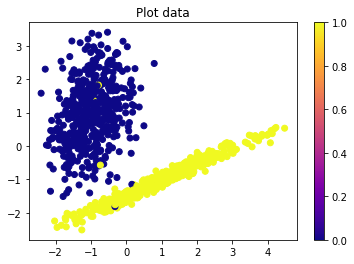

In [3]:
plt.title("Plot data")
plt.scatter(X1[:,0],X1[:,1],c=Y1,cmap="plasma")
plt.colorbar()

In [4]:
x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.2)

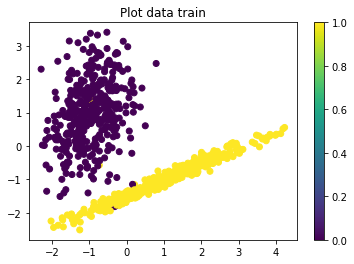

In [5]:
plt.title("Plot data train")
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.colorbar()

In [6]:
classifier = SGDClassifier(loss="log",
                           alpha=0.0001,verbose=1,epsilon=0.1,max_iter=2000)

In [7]:
classifier.fit(x_train,y_train)

-- Epoch 1
Norm: 27.99, NNZs: 2, Bias: -10.430793, T: 800, Avg. loss: 0.322109
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 10.57, NNZs: 2, Bias: -7.780119, T: 1600, Avg. loss: 0.233761
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5.97, NNZs: 2, Bias: -0.087938, T: 2400, Avg. loss: 0.128752
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 8.66, NNZs: 2, Bias: -6.416602, T: 3200, Avg. loss: 0.118679
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 7.00, NNZs: 2, Bias: -3.124279, T: 4000, Avg. loss: 0.108706
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 7.83, NNZs: 2, Bias: -2.466379, T: 4800, Avg. loss: 0.110897
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 6.20, NNZs: 2, Bias: -2.106686, T: 5600, Avg. loss: 0.090424
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 6.59, NNZs: 2, Bias: -2.885779, T: 6400, Avg. loss: 0.078504
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 4.98, NNZs: 2, Bias: -2.781900, T: 7200, Avg. loss: 0.091851
Total training t

SGDClassifier(loss='log', max_iter=2000, verbose=1)

In [8]:
score = classifier.score(x_test,y_test)
print("Le score est {}".format(score))

Le score est 1.0


In [9]:
maxX1 = np.max(X1[:,0])
minX1 = np.min(X1[:,0])
maxX2 = np.max(X1[:,1])
minX2 = np.min(X1[:,1])
x1 = []
x2 = []
for i in np.arange(minX1,maxX1,0.01):
    for j in np.arange(minX2,maxX2,0.01):
        x1.append(i)
        x2.append(j)

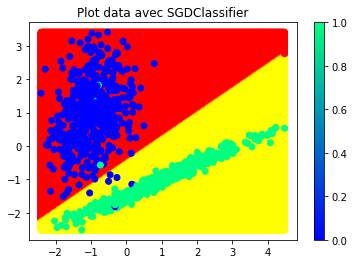

In [10]:
plt.title("Plot data avec SGDClassifier")
plt.scatter(x1,x2,c=classifier.predict(np.vstack((x1,x2)).T),cmap="autumn")
plt.scatter(X1[:,0],X1[:,1],c=Y1,cmap="winter")
plt.colorbar()

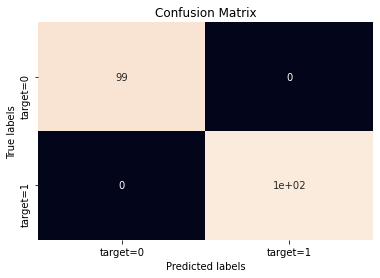

In [11]:
cm = confusion_matrix(y_true=y_test, y_pred=classifier.predict(x_test))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['target=0', 'target=1'])
ax.yaxis.set_ticklabels(['target=0', 'target=1'])
plt.show()

In [12]:
scoreList = []
for i in range(2,21):
    knnBouclage = neighbors.KNeighborsClassifier(n_neighbors=i)
    knnBouclage.fit(x_train, y_train)
    scoreA = knnBouclage.score(x_test,y_test)
    scoreList.append(scoreA)
    print("k = {} et score = {}".format(i,scoreA))

k = 2 et score = 0.99
k = 3 et score = 1.0
k = 4 et score = 1.0
k = 5 et score = 1.0
k = 6 et score = 1.0
k = 7 et score = 1.0
k = 8 et score = 1.0
k = 9 et score = 1.0
k = 10 et score = 1.0
k = 11 et score = 1.0
k = 12 et score = 1.0
k = 13 et score = 1.0
k = 14 et score = 1.0
k = 15 et score = 1.0
k = 16 et score = 1.0
k = 17 et score = 1.0
k = 18 et score = 1.0
k = 19 et score = 1.0
k = 20 et score = 1.0


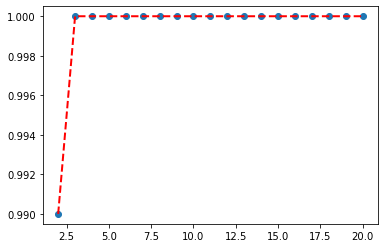

In [13]:
plt.scatter(range(2,21),scoreList)
plt.plot(range(2,21),scoreList,c="red",lw=2,ls="--")

In [14]:
param_grid={'n_neighbors':np.arange(2,21)}
grid=GridSearchCV(neighbors.KNeighborsClassifier(),param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])})

In [15]:
meilleurcas = grid.best_params_['n_neighbors']
print("Meilleur cas : {}".format(meilleurcas))

Meilleur cas : 3


In [16]:
knn = neighbors.KNeighborsClassifier(n_neighbors=meilleurcas)
knn.fit(x_train, y_train)
scoreA = knn.score(x_test,y_test)
scoreList.append(scoreA)
print("k = {} et score = {}".format(meilleurcas,scoreA))

k = 3 et score = 1.0


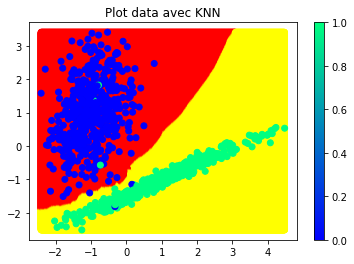

In [17]:
plt.title("Plot data avec KNN")
plt.scatter(x1,x2,c=knn.predict(np.vstack((x1,x2)).T),cmap="autumn")
plt.scatter(X1[:,0],X1[:,1],c=Y1,cmap="winter")
plt.colorbar()

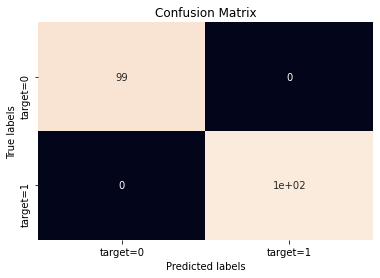

In [18]:
cm = confusion_matrix(y_true=y_test, y_pred=knn.predict(x_test))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['target=0', 'target=1'])
ax.yaxis.set_ticklabels(['target=0', 'target=1'])
plt.show()

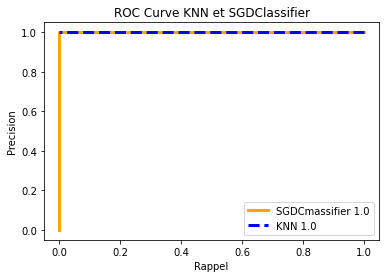

In [19]:
y_predict_classifier = classifier.decision_function(x_test)
#Calcul Presion et Recall
y_pred = knn.predict(x_test)
r = recall_score(y_true=y_test,y_pred=y_pred)
p = precision_score(y_true=y_test,y_pred=y_pred)
x = []
y = []
x.append(r)
y.append(p)
x.append(0)
y.append(p)

fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict_classifier)

auc_classifier = auc(fpr,tpr)
auc_knn = auc(x,y)

plt.title("ROC Curve KNN et SGDClassifier")
plt.plot(fpr,tpr,lw=3,ls="-",label="SGDCmassifier {}".format(auc_classifier),c="orange")
plt.plot(x,y,lw=3,ls="--",label="KNN {}".format(auc_knn),c="blue")
plt.xlabel("Rappel")
plt.ylabel("Precision")
plt.legend()

In [20]:
param_grid1={'gamma':np.arange(0.0001,0.1)}
grid1=GridSearchCV(svm.SVC(),param_grid1)
grid1.fit(x_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'gamma': array([0.0001])})

In [21]:
gamma = grid1.best_params_['gamma']
print("Meilleur cas : {}".format(gamma)) 

Meilleur cas : 0.0001


In [22]:
svc = svm.SVC(kernel='rbf', gamma=gamma)
svc.fit(x_train,y_train)

SVC(gamma=0.0001)

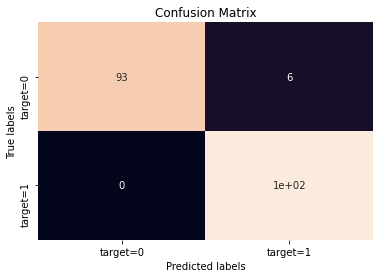

In [23]:
cm = confusion_matrix(y_true=y_test, y_pred=svc.predict(x_test))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['target=0', 'target=1'])
ax.yaxis.set_ticklabels(['target=0', 'target=1'])
plt.show()

In [1]:
y_test_pred1 = svc.decision_function(x_test)
fpr2, tpr2, thr2 = metrics.roc_curve(y_test, y_test_pred1)
auc_svc = auc(fpr2,tpr2)
plt.title("ROC Curve SVC ,SGDClassifier,KNN")
plt.plot(fpr2,tpr2,lw=3,ls="-",label="SVC {}".format(auc_svc),c="red")
plt.plot(fpr,tpr,lw=3,ls="-",label="SGDCmassifier {}".format(auc_classifier),c="orange")
plt.plot(recals,presisions,lw=3,ls="--",label="KNN {}".format(auc_knn),c="blue")
plt.xlabel("Rappel")
plt.ylabel("Precision")
plt.legend()

NameError: name 'svc' is not defined

In [ ]:
maximum = max(auc_svc,auc_classifier,auc_knn)

In [ ]:
if auc_svc == maximum:
    print("Svc est le meilleur")
elif auc_classifier == maximum:
    print("SGDClassifier est le meilleur")
else:
    print("KNN est le meilleur")